# RNN

Recurrent Neural Networks (RNNs) work a bit different from regular neural networks. In neural network the information flows in one direction from input to output. However in RNN information is fed back into the system after each step.

RNNs allow the network to “remember” past information by feeding the output from one step into next step. This helps the network understand the context of what has already happened and make better predictions based on that. For example when predicting the next word in a sentence the RNN uses the previous words to help decide what word is most likely to come next.

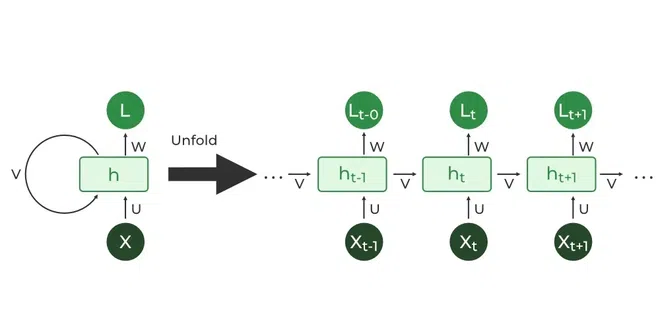

This image showcases the basic architecture of RNN and the feedback loop mechanism where the output is passed back as input for the next time step.

# How RNN Differs from Feedforward Neural Networks?

Feedforward Neural Networks (FNNs) process data in one direction from input to output without retaining information from previous inputs. This makes them suitable for tasks with independent inputs like image classification. However FNNs struggle with sequential data since they lack memory.

Recurrent Neural Networks (RNNs) solve this by incorporating loops that allow information from previous steps to be fed back into the network. This feedback enables RNNs to remember prior inputs making them ideal for tasks where context is important.

# How does RNN work?
At each time step RNNs process units with a fixed activation function. These units have an internal hidden state that acts as memory that retains information from previous time steps. This memory allows the network to store past knowledge and adapt based on new inputs.

# Recurrent Neural Network Architecture

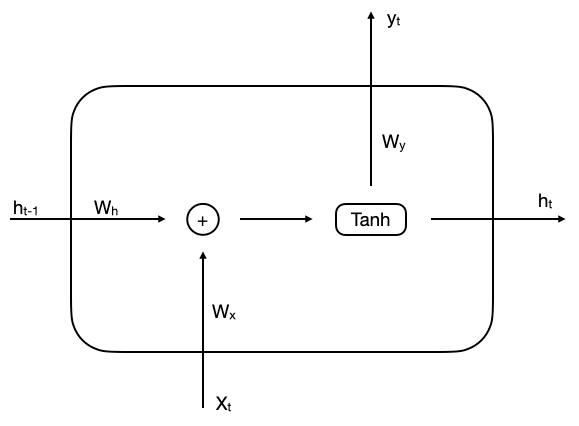

Unlike traditional deep neural networks, where each dense layer has distinct weight matrices, RNNs use shared weights across time steps, allowing them to remember information over sequences.

In RNNs, the hidden state Hi is calculated for every input Xi to retain sequential dependencies. The computations follow these core formulas:

1. Hidden State Calculation:

ht = σ( Wx*X + Wh*ht−1 + B)

Here, ht represents the current hidden state, Wx and Wh are weight matrices and B is the bias.




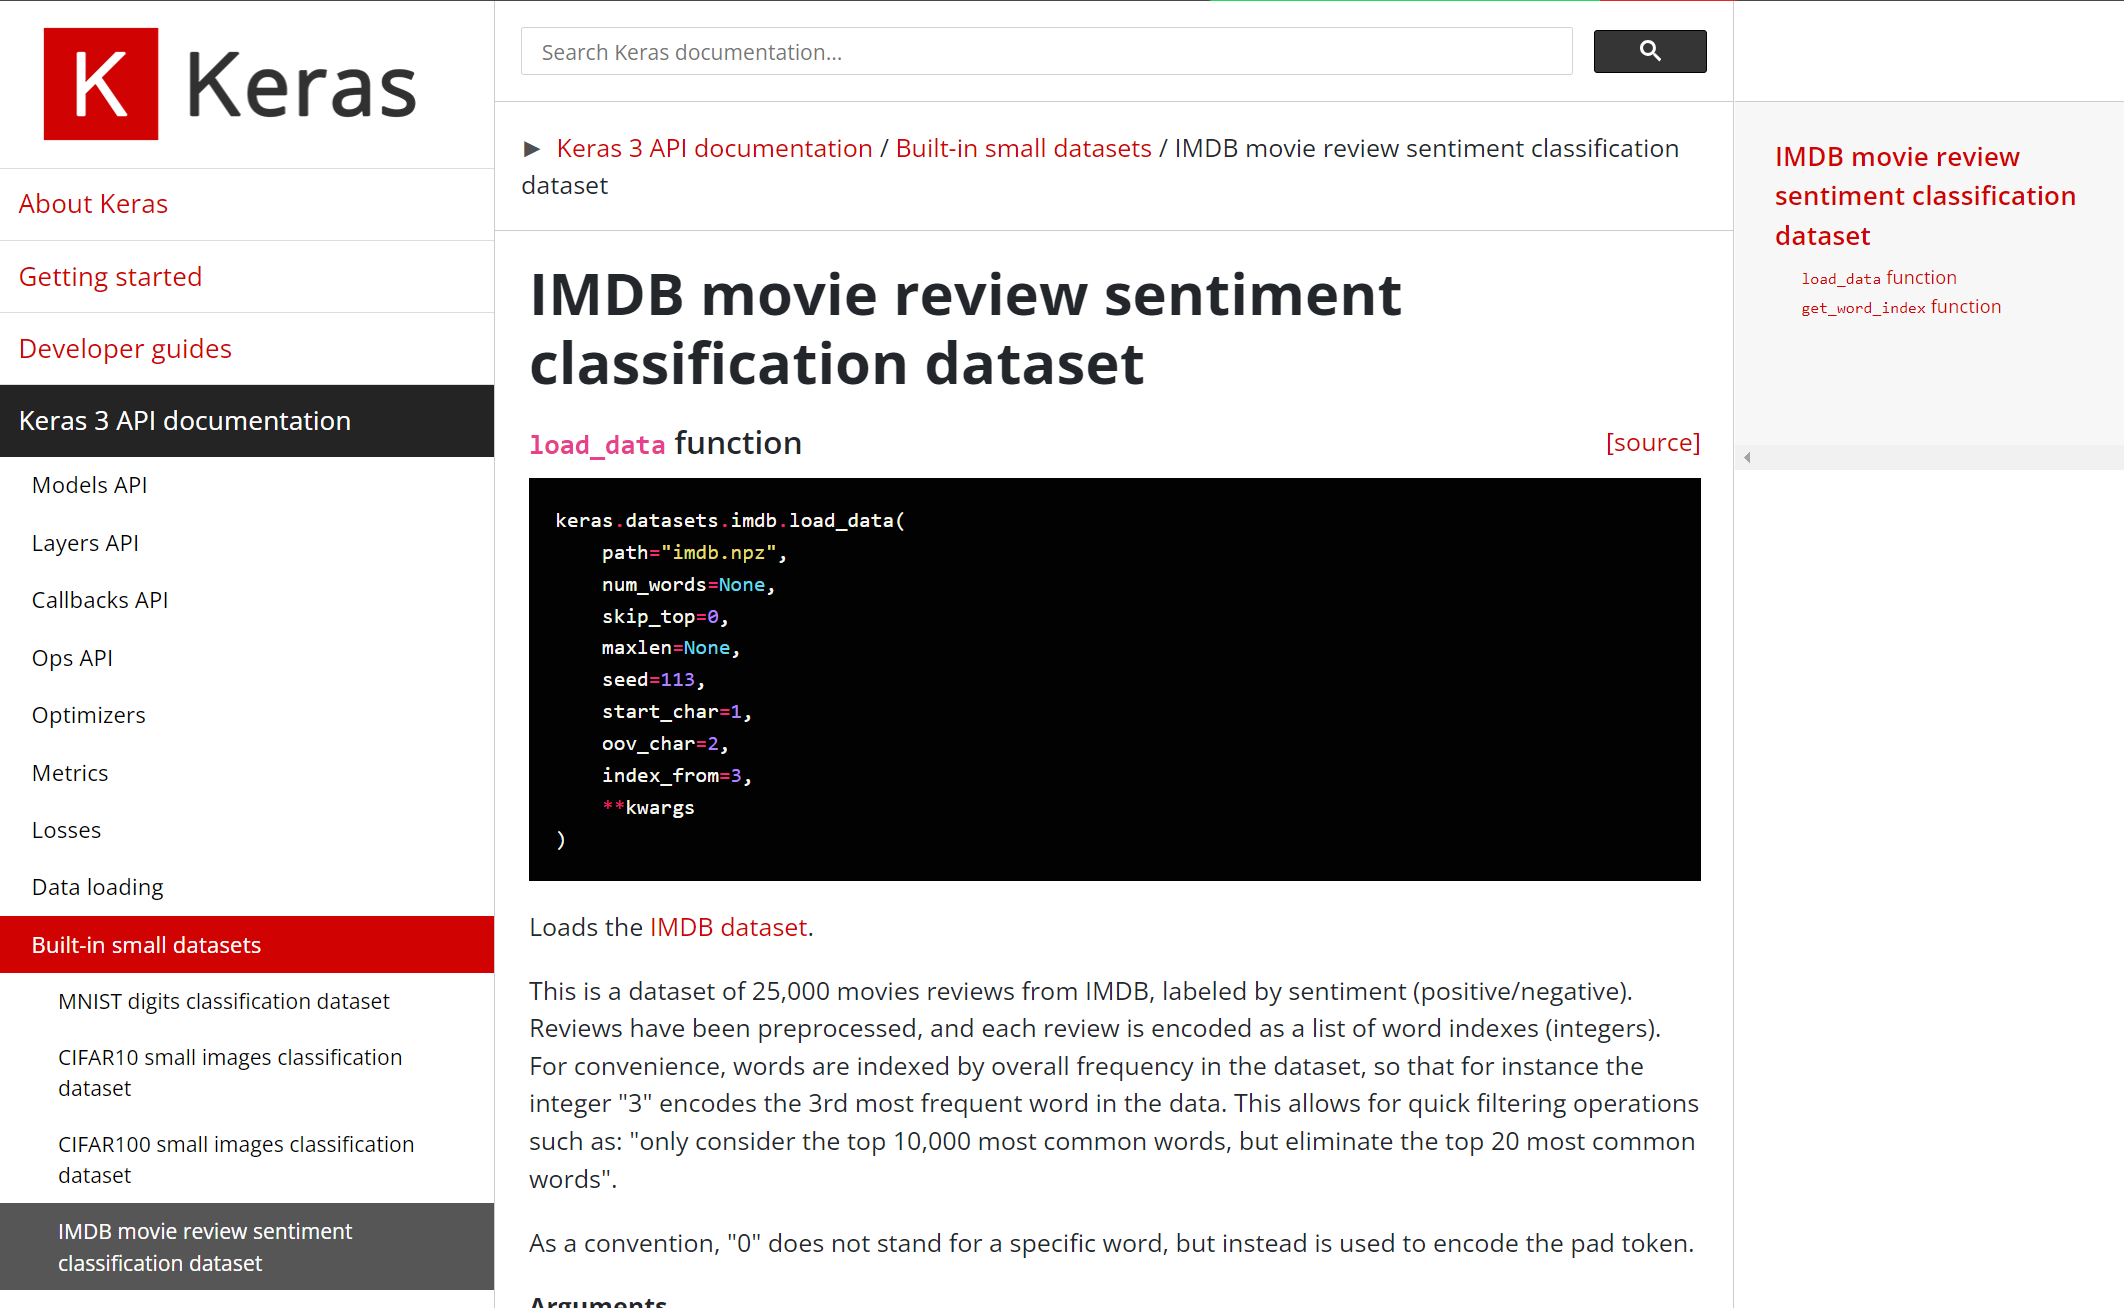

In [1]:
import os
os.getcwd()

'C:\\Users\\deept\\OneDrive\\Desktop\\Data Science and AI master program\\Advance AI\\NLP\\RNN'

In [2]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

# Loading Imbd dataset

In [3]:
max_features = 10000
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=max_features)
print(f"Training data shape : {x_train.shape}, Training labels shape : {y_train.shape}")
print(f"Test data shape : {x_test.shape}, Test labels shape : {y_test.shape}")

Training data shape : (25000,), Training labels shape : (25000,)
Test data shape : (25000,), Test labels shape : (25000,)


In [4]:
#x_train[0]

In [5]:
print(len(x_train[0]))
print(len(x_train[10]))
print(len(x_train[100]))
print(len(x_train[1000]))
print(len(x_train[10000]))
# We can see the reviews are of different length

218
450
158
298
118


In [6]:
y_train[0]

1

In [7]:
#y_train

In [8]:
word_index = imdb.get_word_index() # Retrieves a dict mapping words to their index in the IMDB dataset.
word_index

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [9]:
reverse_word_index = {value : key for key, value in word_index.items()} # Now reversing the dictionary
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

# Looking at sample review

Reverse the word index to obtain a dict mapping indices to words
And subtract 3 to indices to sync with `x_train` (as data has been loaded with start_char=1, oov_char=2, index_from=3)

keras.datasets.imdb.load_data(path="imdb.npz", num_words=None, skip_top=0, maxlen=None, seed=113,
    **start_char=1, oov_char=2, index_from=3,**
    **kwargs
)

In [10]:
sample_review = x_train[100]
sample_label = y_train[100]

In [18]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in sample_review]) 
# get- Returns the value of the item with the specified key or the default value.
decoded_review

"? i am a great fan of david lynch and have everything that he's made on dvd except for hotel room the 2 hour twin peaks movie so when i found out about this i immediately grabbed it and and what is this it's a bunch of ? drawn black and white cartoons that are loud and foul mouthed and unfunny maybe i don't know what's good but maybe this is just a bunch of crap that was ? on the public under the name of david lynch to make a few bucks too let me make it clear that i didn't care about the foul language part but had to keep ? the sound because my neighbors might have all in all this is a highly disappointing release and may well have just been left in the ? box set as a curiosity i highly recommend you don't spend your money on this 2 out of 10"

# Padding the sequence to make reviews of equal lenth

In [19]:
from tensorflow.keras.preprocessing import sequence
max_length = 500

x_train = sequence.pad_sequences(x_train, maxlen=max_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_length)

In [20]:
print(len(x_train[0]))
print(len(x_train[10]))
print(len(x_train[100]))
print(len(x_train[1000]))
print(len(x_train[10000]))

500
500
500
500
500


In [21]:
x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

# Building Embedding RNN method - Many to one  model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [26]:
model = Sequential()
model.add(Embedding(input_dim = max_features, output_dim = 128, input_length = max_length)) # max_length==500, max_features=10000
# Parameter calculation for embedding layer : input_dim* output_dim = 10,000*128 = 1280000
model.add(SimpleRNN(128, activation='relu'))
# Parameter calculation for SimpleRNN Layer : units * (units + input_dim + 1)
# 128 * (128 + 128 + 1) = 128 * 128 + 128 * 128 + 128 = 32,896 
model.add(Dense(1, activation='sigmoid'))
# Parameter calculation for output layer : 128*1 +1(bias)=129
# When using the delayed-build pattern (no input shape specified), you can choose to manually build your model by calling
# `build(batch_input_shape)`:
model.build(input_shape=(None, max_length))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\deept\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,313,025 (5.01 MB)

 Trainable params: 1,313,025 (5.01 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
earlystopping

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2,
                    callbacks=[earlystopping])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 129s 200ms/step - accuracy: 0.5902 - loss: 732.7051 - val_accuracy: 0.6272 - val_loss: 0.6254
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 118s 188ms/step - accuracy: 0.6656 - loss: 59176.2461 - val_accuracy: 0.6084 - val_loss: 0.6425
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 116s 185ms/step - accuracy: 0.6817 - loss: 221281255424.0000 - val_accuracy: 0.5454 - val_loss: 0.7512
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 116s 186ms/step - accuracy: 0.6612 - loss: 0.6120 - val_accuracy: 0.6254 - val_loss: 0.6676
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 117s 187ms/step - accuracy: 0.7251 - loss: 0.5352 - val_accuracy: 0.6928 - val_loss: 0.6015
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 117s 187ms/step - accuracy: 0.7770 - loss: 0.4659 - val_accuracy: 0.6826 - val_loss: 0.5927
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 116s 185ms/step - accuracy: 0.8072 - loss: 0.4235 - val_accuracy: 0.7166 - val_loss: 0.5697
Epoch 8/10
600/625 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - acc

In [23]:
# Saving model
model.save('simple_rnn_imdb.h5')

In [24]:
# Loading model
from tensorflow.keras.models import load_model
model1 = load_model('/content/simple_rnn_imdb.h5')
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,313,027 (5.01 MB)

 Trainable params: 1,313,025 (5.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [25]:
model1.get_weights()

[array([[ 1.2823102e+00, -6.7149162e-01,  1.0666423e+00, ...,
          2.3352948e-01, -8.4553277e-01,  7.2671115e-01],
        [ 4.4147172e-03, -4.2868987e-02,  1.1522636e-01, ...,
          1.3679776e-01, -6.5303072e-02, -1.3483286e-02],
        [ 1.5092848e-02,  1.1107914e-01,  3.1336661e-02, ...,
         -4.1673720e-02, -8.9007139e-02, -6.2979564e-02],
        ...,
        [-8.0295175e-02, -2.4558725e-02,  8.2838640e-02, ...,
          4.6527781e-02,  6.9653556e-02, -9.0676181e-02],
        [-3.6765058e-02,  5.7158444e-02, -1.2784371e-04, ...,
          8.3529074e-03,  3.1537756e-02,  2.4353025e-02],
        [-8.9298598e-02, -3.4734346e-02,  8.2571991e-02, ...,
          1.2198273e-01,  3.4500550e-02, -6.5093592e-02]], dtype=float32),
 array([[-0.10633969, -0.14221455, -0.20954986, ...,  0.04281318,
         -0.15274511, -0.06943012],
        [ 0.14775647, -0.01905615, -0.03946521, ..., -0.11263569,
          0.10469881,  0.13445121],
        [-0.08500993,  0.05512499, -0.13433462

In [27]:
# Creating function
def preprocess_text(text):
  words = text.lower().split()
# dictionary.get(keyname, value) - The keyname of the item you want to return the value from and  A value to return if the specified key does not exist.Default value 2
  encoded_review = [word_index.get(word, 2) + 3 for word in words]
  padded_review = sequence.pad_sequences([encoded_review], maxlen=500)
  return padded_review

In [28]:
def predict_sentiment(review):
  preprocessed_input = preprocess_text(review)
  prediction = model1.predict(preprocessed_input) # predict() returns  NumPy array(s) of predictions.
  sentiment = 'Positive' if prediction[0][0]>0.5 else 'Negative'
  return sentiment, prediction[0][0]

In [30]:
# Check your model performance
sentence  = "This moview was simply amazing! The way actor acting was great and shows the talent"
sentiment, score = predict_sentiment(sentence)
print(sentence)
print(sentiment)
print(score)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
This moview was simply amazing! The way actor acting was great and shows the talent
Positive
0.5465384
